In [43]:
#lib imports
import numpy as np
import math
import matplotlib.pyplot as plt

In [44]:
#this function updates the current distance travelled by robot
def distance_update(d_current):
    d_total = d_current + d
    return (d_total) #returns the total travelled distance

In [45]:
#time update function
def time_update(t_current):
    t_total = t_current + t_interval
    return t_total #return the time

In [46]:
#this function updates the x and y position of the robot each time step based on the
#distance travelled per time step, and the initial angle
def update_pos(x,y):
    delta_x = (d * (math.cos(math.radians(theta_init))))
    delta_y = (d * (math.sin(math.radians(theta_init))))
    #print("delta_x: ", delta_x)
    return (x + delta_x, y + delta_y)

In [ ]:
def update(x, y, t_current, d_current):
    x,y = update_pos(x,y)
    t = time_update(t_current)
    d = distance_update(d_current)
return(x,y,t,d)

In [62]:
#simulation constants

#"time interval" between "measurements"
t_interval = 0.1

#initial position
x_init = 0 #robot starts at origin
y_init = 0

#initialize the robot position
x = x_init
y = y_init

#initial angle
theta_init = 45

#distance to travel (m)
d_goal = 5
d_trav = 0

#reset time
t = 0

#reset pos
x = x_init
y = y_init
pos = []

In [63]:
#robot characteristics constants
#robot wheelbase (metres between wheels)
wheelbase = 0.25

#ticks per meter
tpm = 1000

#robot velocity (m/s)
v = 0.1

#distance travelled per time interval =  v (m/s) * t_interval (s) = (m)
d = v * t_interval

In [64]:
#initalization
#reset time
t = 0
#create an empty list for positions
pos = []

In [66]:
#kalman characteristics
H_k = ([1, 0], [0, 1])
A_k = ([1, 0], [0, 1])

In [68]:
pos.append((x,y)) #append the starting position
while d_trav < d_goal:
    d_trav= distance_update(d_trav)
    t = time_update(t)
    x,y = update_pos(x, y)
    pos.append((x,y))
    #print("d_trav: ", d_trav)
    #print("x, y: ", x, y)
    #print(d_trav, t, x, y)

In [70]:
L_pos = []
itr = 0
while itr < len(pos):
    x_wheel_pos = (pos[itr][0] - (wheelbase/2)*math.cos(math.radians(90-theta_init)))
    y_wheel_pos = (pos[itr][1] + (wheelbase/2)*math.sin(math.radians(90-theta_init)))
    L_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1

In [71]:
R_pos = []
itr = 0
while itr < len(pos):
    x_wheel_pos = (pos[itr][0] + (wheelbase/2)*math.cos(math.radians(90-theta_init)))
    y_wheel_pos = (pos[itr][1] - (wheelbase/2)*math.sin(math.radians(90-theta_init)))
    R_pos.append((x_wheel_pos,y_wheel_pos))
    itr+=1

In [72]:
#print(L_pos)

In [73]:
#print(pos)

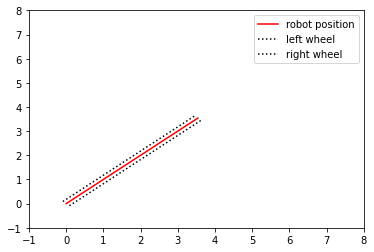

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure()
plt.xlim(-1,8)
plt.ylim(-1,8)
plt.plot(*zip(*pos), label = 'robot position', color = 'r')
x_L,y_L = zip(*L_pos)
plt.plot(x_L,y_L, label = 'left wheel', color = 'k', linestyle = 'dotted')
x_R,y_R = zip(*R_pos)
plt.plot(x_R,y_R, label = 'right wheel', color = 'k', linestyle = 'dotted')
plt.legend()
plt.show()
plt.clf()

In [75]:
def create_noise(pos, error):
    noise = []
    for itr in pos:
        noise.append((itr[0] + np.random.normal(0, error), itr[1] + np.random.normal(0, error)))
    return noise

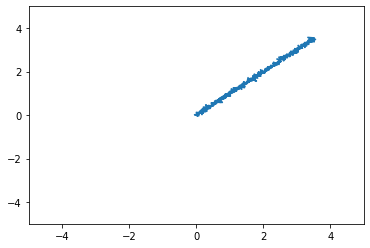

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure()
plt.xlim(-5,5)
plt.ylim(-5,5)
noisy = create_noise(pos, 0.05)
#print(noisy)
x,y = zip(*noisy)
plt.plot(x,y)
plt.show()
plt.clf()